# Fiverr's workshop
## Eitan Lifshits | Senior Data Scientist
### The goals of the workshop are: 
* Develope text classification Machine Learning algorithm
* Use scikit-learn package in a more advanced and flexible way (mainly Pipeline class)

## We'll work on a text classification task including the following steps:
1. Load data and make some preliminary explorations
2. Data preprocessing
3. Feature Extraction
4. Train classifier 
6. Analyze the results

For the whole process, we'll use the sklearn Pipeline class to include it all in one class (and train it)

Comment: The goal of the workshop is not necessarily getting the highest model performance , but rather try as many pipline features as possible to apply on future projects

## Data Description
### Tipping project
Recognize which buyer is likely to give a tip to his seller after order is done.
A buyer and a seller interaction is done through Fiverr's messages platform. The job requirements, explanations and comments are all part of their interaction. If the buyer is really satisfied with the job, he can add tip to the payment. Our goal is to recognize those sellers whom are likely to give a tip by analyzing the messages.

## In the work shop we'll explore relevant dataset (messages) and build classification algorithms
Our focus will be on:
* Building a text based classification model
* Using Sklearn's Pipelines to build a model including several steps, including preprocessing, dimension reduction and more
* Apply grid/random search for hyperparameter optimization
* Building a custom step in the pipeline

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Initial Data Exploration

In [3]:
data = pd.read_csv('dataset - Eitan Lifshits.csv')
data.shape

(56715, 2)

In [6]:
data.head()

,text,label
0,1- ok what about spine dimensions pls? see pre...,0
1,1. Authentic Guitar Series\n2. Your source for...,0
2,1. I am a business and life coach\r\n2. Kirkle...,0
3,1. Lucky Supply\r\n2. Paper Plastic Food Servi...,0
4,392henny\nThis is my logo if you need another ...,0


### Building a dictionary

In [5]:
data['label'].value_counts(normalize=True)

0    0.617491
1    0.382509
Name: label, dtype: float64

In [11]:
len_char= data['text'].apply(lambda s: len(s))
len_char

0        253
1        254
2        241
3        248
4        256
        ... 
56710    255
56711    507
56712    502
56713    499
56714    755
Name: text, Length: 56715, dtype: int64

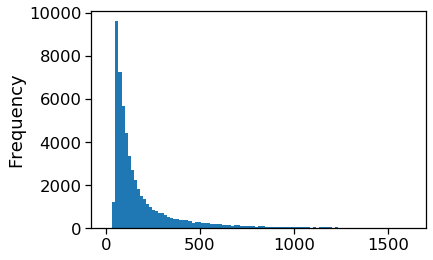

In [23]:
len_char[len_char<len_char.quantile(.99)].plot(kind='hist', bins=100);

In [9]:
len_word= data['text'].apply(lambda s: len(s.split()))
len_word

0         34
1         42
2         45
3         43
4         53
        ... 
56710     55
56711     96
56712     94
56713     97
56714    127
Name: text, Length: 56715, dtype: int64

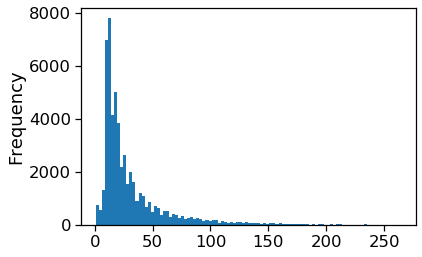

In [22]:
len_word[len_word<len_word.quantile(.99)].plot(kind='hist', bins=100);

In [15]:
len_word.describe()

count    56715.000000
mean        37.777519
std         49.803427
min          1.000000
25%         13.000000
50%         21.000000
75%         40.000000
max       1108.000000
Name: text, dtype: float64

In [16]:
len_char.describe()

count    56715.000000
mean       223.521238
std        301.520784
min          3.000000
25%         74.000000
50%        117.000000
75%        233.000000
max       6180.000000
Name: text, dtype: float64

In [24]:
data = data[(len_word < len_word.quantile(.99))|(len_char < len_char.quantile(0.99))]

In [25]:
data.shape

(56218, 2)

# Basics of sklearn
### Sklearn uses 3 main methods:
* fit()
* transform()
* predict()

Features related algorithm will usually implement fit() and transform()

ML algorithms will usually implement fit() and predict()

### Meathods

fit(): Learns and save attributes related to the algorithm

Examples:

* RandomForest: Learns the trees
* SVM: Applying stochastic gradient decent to find the plane's coefficients
* PCA: Calculates correlation matrix and its eigen vectors

transform(): Use the atttribtues saved in fit() to apply on new data

Examples:

* CountVectorizer: Will create a frequency vectors by the dictionary saved in fit()

predict(): Use the atttribtues saved in fit() to apply on new data

Examples:

RandomForest: Will walk throgh each tree and return the majority class in the resulted leaf (and then the majority vote of those)

SVM: Will do inner product between the plane's coefficients and the feature vector and return the sign.

# Bag of Words and Tfidf feature extraction and linear SVM classifier
Quick reminder of BoW and tfidf
* BoW: Given a set of documents, creating a NxD matrix structure, where N is the number of documents and D is the vocabulary size. The columns are the feature space and are the vocabulary including all terms in all docs.  
So, Element i, j contains the frecuency of term j in document i
* Tfidf: A method to assign weights for each document term, taking into consideration the frequency of a term in a documnt (tf) and the frequency of a term accross all documents (df)  
* TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).  
* IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

IDF(t) = log(Total number of documents / Number of documents with term t in it).  
The filnal weight will be: tfidf = tf x idf  

Example:  
Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv = CountVectorizer()
_ = cv.fit(data['text'])

In [49]:
cv.get_features_name()

AttributeError: 'CountVectorizer' object has no attribute 'get_features_name'

In [ ]:
cv.get.features_name()

In [31]:
text_bow = cv.transform(data['text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer


In [32]:
text_bow

<56218x78659 sparse matrix of type '<class 'numpy.int64'>'
	with 1485509 stored elements in Compressed Sparse Row format>

In [38]:
indx = np.where(text_bow.getrow(0).toarray()>0)[1]
features_names = np.array(cv.get_feature_names())[indx]
weights = text_bow.getrow(0).toarray()[0][indx]
list(zip(features_names,weights))

[('7770991', 3),
 ('978', 3),
 ('about', 1),
 ('and', 1),
 ('cover', 1),
 ('different', 1),
 ('dimensions', 1),
 ('ebook', 2),
 ('formats', 1),
 ('hard', 1),
 ('hardcover', 1),
 ('have', 1),
 ('isbn', 4),
 ('message', 1),
 ('note', 1),
 ('numbers', 1),
 ('ok', 1),
 ('paperback', 2),
 ('pls', 2),
 ('previous', 1),
 ('see', 1),
 ('spine', 1),
 ('that', 1),
 ('three', 1),
 ('what', 1)]

## Training a classifier
Training a Linear SVM model on the Tfidf features

In [40]:
tfidf = TfidfTransformer()
_ = tfidf.fit(text_bow)

In [42]:
text_tfidf = tfidf.transform(text_bow)
text_tfidf

<56218x78659 sparse matrix of type '<class 'numpy.float64'>'
	with 1485509 stored elements in Compressed Sparse Row format>

In [43]:
indx = np.where(text_tfidf.getrow(0).toarray()>0)[1]
features_names = np.array(cv.get_feature_names())[indx]
weights = text_tfidf.getrow(0).toarray()[0][indx]
list(zip(features_names,weights))

[('7770991', 0.5093956238353842),
 ('978', 0.4364811247495071),
 ('about', 0.05963267109066773),
 ('and', 0.026548549692077584),
 ('cover', 0.07762422503811664),
 ('different', 0.07337289942922347),
 ('dimensions', 0.10835037040668807),
 ('ebook', 0.20762715732894796),
 ('formats', 0.11610765930932768),
 ('hard', 0.07694780490673696),
 ('hardcover', 0.14708480394920348),
 ('have', 0.03998369007043923),
 ('isbn', 0.5197798820185454),
 ('message', 0.0797398946666168),
 ('note', 0.09224057988285865),
 ('numbers', 0.10184492725394373),
 ('ok', 0.07617723624831929),
 ('paperback', 0.2330908258229687),
 ('pls', 0.20705906126376264),
 ('previous', 0.08672161036881967),
 ('see', 0.05856892378792477),
 ('spine', 0.12088982699683094),
 ('that', 0.04096966863211936),
 ('three', 0.09232967419343056),
 ('what', 0.051577864907798206)]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label'],test_size=0.3)

In [54]:
tfidf = TfidfVectorizer()

In [55]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [ ]:
model=LinearSVC(X_test)

## Using pipeline to include both steps in one object
The idea of pipeline is to allow creating a full model cycle in one class constructs of several steps, where the output of each step is the input of the consecutive one (until the predict step)

In [3]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = 

### Try different hyperparameters

### Huperparameter optimization

In [4]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'tfidf__min_df': list(range(1, 4)),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__stop_words': [None, 'english'],
    'clf__C': [1, 10, 100]
}

## Building custom classes for pipeline


In [5]:
# A general sklearn class structure
from sklearn.base import BaseEstimator

class CustomTransformer(BaseEstimator):
    """
    a general class for creating a machine learning step in the machine learning pipeline
    """
    def __init__(self):
        """
        constructor
        """

    def fit(self, X, y=None, **kwargs):
        """
        an abstract method that is used to fit the step and to learn by examples
        :param X: features - Dataframe
        :param y: target vector - Series
        :param kwargs: free parameters - dictionary
        :return: self: the class object - an instance of the transformer - Transformer
        """
        pass

    def transform(self, X, y=None, **kwargs):
        """
        an abstract method that is used to transform according to what happend in the fit method
        :param X: features - Dataframe
        :param y: target vector - Series
        :param kwargs: free parameters - dictionary
        :return: X: the transformed data - Dataframe
        """
        pass

### Lets create a stemming step
Stemming means normalizing a word into its stem

E.g: walking, walkers, walks ==> walk

## Using Embedding features
So far we used simple dictionary based features.

We can also create an embbeding layer to transform the texts into embedding features

There are many embedding algorithms, but we'll use Word2Vec to create our embedding layer and implement it as a pipeline step

## Word2Vec algorithm
Creating a new space in selected dimension (usualy much smaller than the dictionary), where related words are closed to each other.
Representing each word in our dictionary as a new vector of numbers.

In [6]:
from gensim.models import Word2Vec

## Building the Word2Vec embedding layer

In [7]:
class Embedding(BaseEstimator):
    def __init__(self, size=100, window=5):
        self.analyzer = TfidfVectorizer().build_analyzer()
        self.size = size
        self.window = window
        self.wv = None

    def fit(self, X, y=None):
        # implement here
        return self

    def transform(self, X, y=None):
        # implement here
        return self
        
    def _get_embedding_vector(self, text):
        vecs = []
        for term in self.analyzer(text):
            if term in self.wv:
                vecs.append(self.wv[term])
        if vecs:
            return np.vstack(vecs).mean(0).tolist()
        else:
            return [0] * 100

## Building your own Pipeline
Some additional classes:

TruncatedSVD - Dimensionality reduction
* import: from sklearn.decomposition import TruncatedSVD
* should be used after Feature Extraction step like Tfidf/hashing transformation
* hyperparameter: n_components

HashingVectorizer - Dimensionality reduction / Feature Extraction
* import: from sklearn.feature_extraction.text import HashingVectorizer
* hyperparameter: n_features, stop_words